# Recurrent Neural Network (RNN)
Sentiment analysis on the IMDb movie reviews dataset. This task involves classifying movie reviews as positive or negative based on their textual content.

## gol kernel initalizer

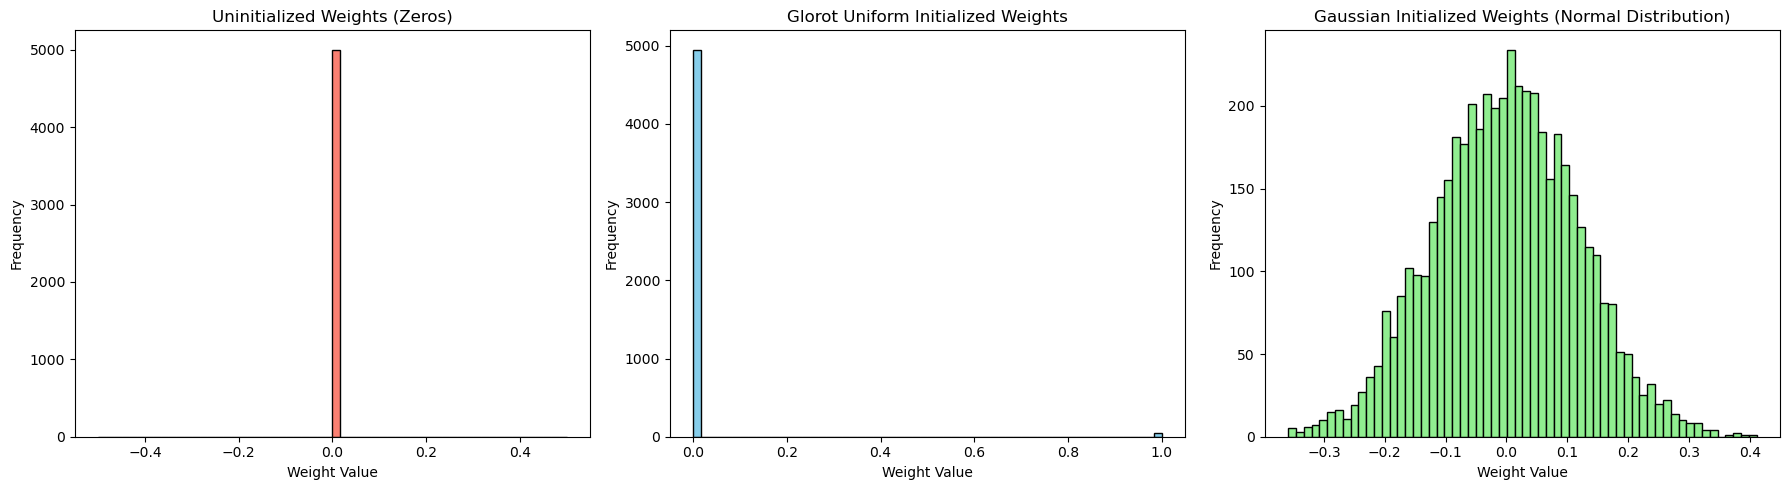

In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the shape of the weight tensor (e.g., for a layer with 100 inputs and 50 outputs)
input_dim = 100
output_dim = 50
shape = (input_dim, output_dim)

# Step 1: Generate uninitialized weights (zeros)
uninitialized_weights = tf.Variable(tf.zeros(shape))

# Step 2: Initialize weights using Glorot Uniform
# glorot_initializer = tf.keras.initializers.GlorotUniform()
# glorot_initializer = tf.keras.initializers.Orthogonal()
# glorot_initializer = tf.keras.initializers.Constant()
# glorot_initializer = tf.keras.initializers.Identity()
glorot_initializer = tf.keras.initializers.IdentityInitializer()
# glorot_initializer = tf.keras.initializers.GlorotNormal()
glorot_initialized_weights = glorot_initializer(shape=shape)

# Step 3: Initialize weights using Gaussian (normal) distribution
# Set standard deviation based on shape for a fair comparison
stddev = np.sqrt(2.0 / (input_dim + output_dim))  # Similar to He initialization for Gaussian
gaussian_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=stddev)
gaussian_initialized_weights = gaussian_initializer(shape=shape)

# Convert weights to numpy arrays and flatten for visualization
uninitialized_weights_np = uninitialized_weights.numpy().flatten()
glorot_initialized_weights_np = glorot_initialized_weights.numpy().flatten()
gaussian_initialized_weights_np = gaussian_initialized_weights.numpy().flatten()

# Plot the distributions
plt.figure(figsize=(18, 5))

# Plot uninitialized weights
plt.subplot(1, 3, 1)
plt.hist(uninitialized_weights_np, bins=60, color='salmon', edgecolor='black')
plt.title("Uninitialized Weights (Zeros)")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")

# Plot Glorot Uniform initialized weights
plt.subplot(1, 3, 2)
plt.hist(glorot_initialized_weights_np, bins=60, color='skyblue', edgecolor='black')
plt.title("Glorot Uniform Initialized Weights")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")

# Plot Gaussian (Normal) initialized weights
plt.subplot(1, 3, 3)
plt.hist(gaussian_initialized_weights_np, bins=60, color='lightgreen', edgecolor='black')
plt.title("Gaussian Initialized Weights (Normal Distribution)")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


## Fundamentals of Tensorflow for RNN 

/opt/homebrew/Caskroom/miniconda/base/envs/113_Python/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


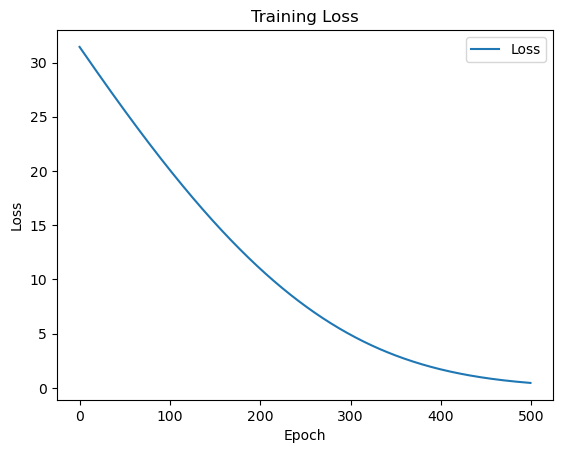

np.array([5]) = [5]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
(1, 1, 1)
test input: [[[5]]] => Predicted next value after 5: 5.424453258514404


In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Sample data: input and target sequences
x_train = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]], dtype=np.float32).reshape(-1, 1, 1)
y_train = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]], dtype=np.float32).reshape(-1, 1, 1)
# print(f"x_train.shape = {x_train.shape}, y_train.shape = {y_train.shape}")
# Define the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN( units=2, 
                                input_shape=(None, 1), 
                                activation="relu", 
                                return_sequences=True),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model and store the history
epochs = 500
history = model.fit(x_train, y_train, epochs=epochs, verbose=0)

# Plot the training loss
def plot_training_history(history):
    plt.plot(history.history['loss'], label='Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Call the function to plot
plot_training_history(history)

# Test the model by predicting the next value in the sequence
print(f"np.array([5]) = {np.array([5])}")
test_input = np.array([5]).reshape(1, 1, 1)  # Next in sequence after 4 is expected to be close to 5
predicted_next_value = model.predict(test_input)
print(predicted_next_value.shape)
print(f"test input: {test_input} => Predicted next value after 5: {predicted_next_value[0,0,0]}")


In [4]:
import tensorflow as tf
import numpy as np

# Generate some simple sequential data
def generate_data(seq_length=10):
    x = np.array([i for i in range(seq_length)], dtype=np.float32)
    y = np.roll(x, shift=-1)  # target is the next value in sequence
    return x[:-1].reshape(1, -1, 1), y[:-1].reshape(1, -1, 1)

# Create training data
seq_length = 10
x_train, y_train = generate_data(seq_length)

# Define an RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=50, input_shape=(None, 1), activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x_train, y_train, epochs=200, verbose=0)

# Test the model by predicting the next value in the sequence
test_seq = np.array([[seq_length]], dtype=np.float32).reshape(1, 1, 1)
predicted_next_value = model.predict(test_seq)

print(f"Predicted next value: {predicted_next_value}")


2024-11-09 16:11:45.621659: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-11-09 16:11:45.621754: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-11-09 16:11:45.621778: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-11-09 16:11:45.622108: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-09 16:11:45.622128: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/homebrew/Caskroom/miniconda/base/envs/113_Python/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted next value: [[1.9325699]]


## Fundamentals of PyTorch for RNN

In [6]:
import torch
import torch.nn as nn
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(0)

# Generate simple sequential data
def generate_data(seq_length=10):
    x = np.array([i for i in range(seq_length)], dtype=np.float32)
    y = np.roll(x, shift=-1)  # target is the next value in sequence
    return x[:-1].reshape(-1, 1, 1), y[:-1].reshape(-1, 1, 1)

# Create training data
seq_length = 10
x_train, y_train = generate_data(seq_length)

# Convert data to PyTorch tensors
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

# Define the RNN model
class SimpleRNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, output_size=1):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)  # Get output and hidden state from RNN
        out = self.fc(out)    # Pass through a fully connected layer
        return out

# Initialize model, define loss and optimizer
model = SimpleRNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()    # Clear gradients for this training step
    output = model(x_train)  # Forward pass
    loss = criterion(output, y_train)  # Compute loss
    loss.backward()          # Backpropagation
    optimizer.step()         # Apply gradient descent

    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Test the model by predicting the next value in the sequence
model.eval()
test_seq = torch.tensor([[[seq_length]]], dtype=torch.float32)
predicted_next_value = model(test_seq)

print(f"Predicted next value: {predicted_next_value.item()}")


Epoch [20/200], Loss: 2.2296
Epoch [40/200], Loss: 0.8748
Epoch [60/200], Loss: 0.2891
Epoch [80/200], Loss: 0.2160
Epoch [100/200], Loss: 0.1579
Epoch [120/200], Loss: 0.1209
Epoch [140/200], Loss: 0.0951
Epoch [160/200], Loss: 0.0765
Epoch [180/200], Loss: 0.0627
Epoch [200/200], Loss: 0.0521
Predicted next value: 9.62148380279541


### Dataset Overview:
The IMDb dataset comprises 50,000 movie reviews, evenly split between positive and negative sentiments. For this example, we'll utilize the dataset available through TensorFlow Datasets, which simplifies data loading and preprocessing.

In [ ]:
#Import Necessary Libraries
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [ ]:
# Load the IMDb dataset
(train_data, test_data), info = tfds.load(
    'imdb_reviews',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

# Define constants
BUFFER_SIZE = 10000 # Buffer size for shuffling the dataset
BATCH_SIZE = 64 # Batch size
VOCAB_SIZE = 1000 # Vocabulary size
EMBEDDING_DIM = 64 # Embedding dimension
MAX_SEQUENCE_LENGTH = 500 # Maximum sequence length

# Prepare the training and testing datasets
train_data = train_data.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
